In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)



# Convert slow_ln_temp to its original temperature scale for plotting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Slope of the log-log plot: 1.0135618206413577
Slope of the log-log plot: -1.012890642186567


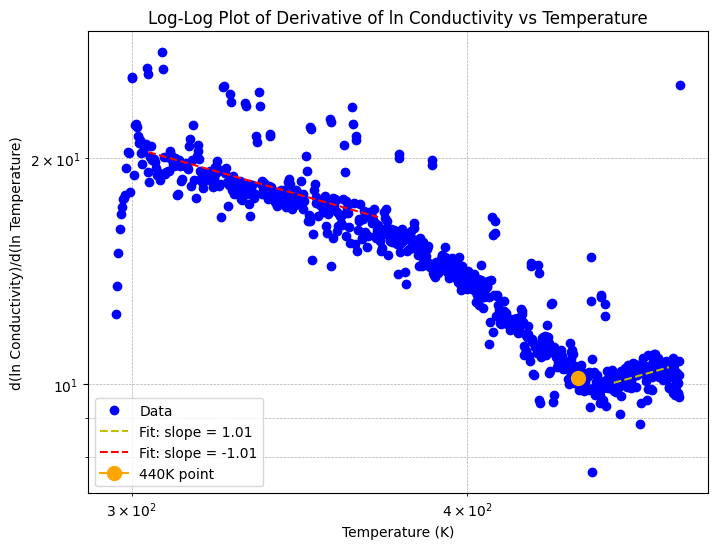

In [3]:
# Read the data
fast_cool = pd.read_csv("/workspaces/kakalioslab/another_slow_and_fast_cooling/data folder/fast_cool_up_470.csv")
slow_cool = pd.read_csv("/workspaces/kakalioslab/another_slow_and_fast_cooling/data folder/slow_cool_up_470.csv")

fast_temp = fast_cool["Temperature (K)"]
fast_cond = fast_cool["Conductivity (Ohm-cm)^-1"]
slow_temp = slow_cool["Temperature (K)"]
slow_cond = slow_cool["Conductivity (Ohm-cm)^-1"]

fast_ln_cond = np.log(fast_cond)
slow_ln_cond = np.log(slow_cond)
fast_ln_temp = np.log(fast_temp)
slow_ln_temp = np.log(slow_temp)

slow_W = np.gradient(slow_ln_cond, slow_ln_temp)
slow_ln_W = np.log(slow_W)

fast_W = np.gradient(fast_ln_cond, fast_ln_temp)
fast_ln_W = np.log(fast_W)

i = 608
j = 700
a = 30
b = 280


slope_slow1, intercept_slow1, r_value1, p_value1, std_err1 = linregress(slow_ln_temp[i:j], slow_ln_W[i:j])
slope_slow2, intercept_slow2, r_value2, p_value2, std_err2 = linregress(slow_ln_temp[a:b], slow_ln_W[a:b])

print(f"Slope of the log-log plot: {slope_slow1}")
print(f"Slope of the log-log plot: {slope_slow2}")

fitted_line_slow1 = np.exp(intercept_slow1) * slow_temp ** slope_slow1
fitted_line_slow2 = np.exp(intercept_slow2) * slow_temp ** slope_slow2
        
plt.figure(figsize=(8, 6))
plt.loglog(slow_temp, slow_W, marker='o', linestyle='none', color='b', label='Data')
plt.loglog(slow_temp[i:j], fitted_line_slow1[i:j], linestyle='--', color='y', label=f'Fit: slope = {slope_slow1:.2f}')
plt.loglog(slow_temp[a:b], fitted_line_slow2[a:b], linestyle='--', color='r', label=f'Fit: slope = {slope_slow2:.2f}')
plt.loglog(440, 10.2, marker='o', markersize=10, color='orange', label="440K point")
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [4]:
# Extract the relevant data points
x = slow_temp[560:]
y = slow_cond[560:]

# x = slow_temp
# y = slow_cond
# Fit a polynomial to the logarithm of the y data
log_y = np.log(y)
coefficients = np.polyfit(x, log_y, 1)  # Change 1 for a different degree fit
fit_log_y = np.poly1d(coefficients)

# Generate y values using the fit line and convert back to the original scale
y_fit = np.exp(fit_log_y(x))

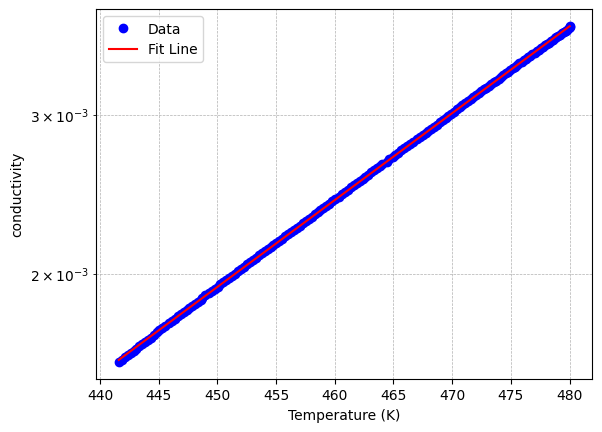

In [5]:
# print(slow_temp)
# plt.figure(figsize=(8, 6))
# Plot the original data
plt.plot(x, y, marker='o', linestyle='none', color='b', label='Data')

# Plot the fit line
plt.plot(x, y_fit, linestyle='-', color='r', label='Fit Line')
# plt.loglog(slow_temp[i:j], fitted_line_slow1[i:j], linestyle='--', color='y', label=f'Fit: slope = {slope_slow1:.2f}')
# plt.loglog(slow_temp[a:b], fitted_line_slow2[a:b], linestyle='--', color='r', label=f'Fit: slope = {slope_slow2:.2f}')
# plt.loglog(440, 10.2, marker='o', markersize=10, color='orange', label="440K point")
plt.yscale("log")
plt.xlabel('Temperature (K)')
plt.ylabel('conductivity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [6]:
slope, intercept = coefficients
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"T_o: {1/slope}")
print(f"sigma_o:  {np.exp(intercept)}")

Slope: 0.02215813965317584
Intercept: -16.21943115549229
T_o: 45.13014249626655
sigma_o:  9.036298101240744e-08


Now, we are going to do some data digitization for other curves of berthlot that I found in different other papers.

Slope: 0.08532340253568495, Intercept: -41.833980905641724


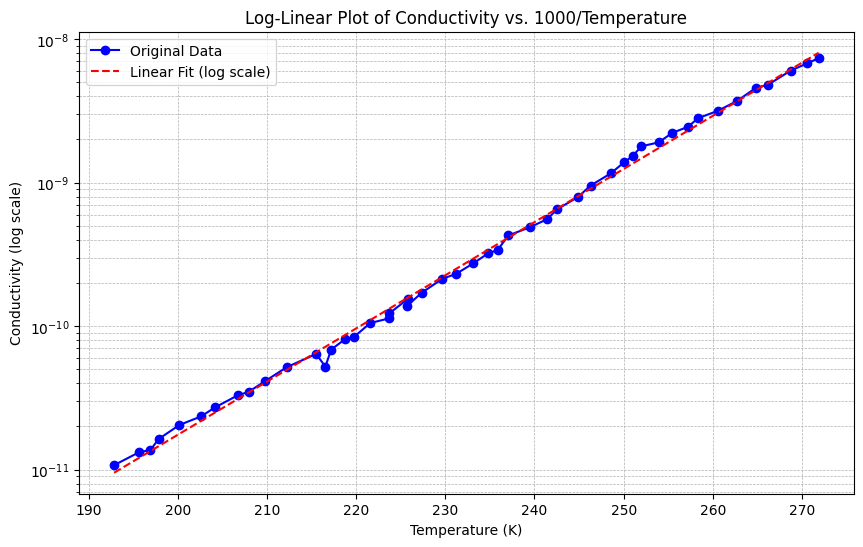

T_o: 11.72011394625019
sigma_o:  6.787860941595428e-19


In [7]:
# AsTe

data = [
    (192.86268924963616, 1.0740297908746607e-11),
    (195.6904016359765, 1.3241918371672914e-11),
    (196.92525923289836, 1.367380050221075e-11),
    (197.85863170891824, 1.634443726549344e-11),
    (200.18794568061682, 2.0476996873912063e-11),
    (202.61085391886033, 2.348503137510128e-11),
    (204.176236529095, 2.713398890066872e-11),
    (206.69935914219977, 3.2875346589875616e-11),
    (207.93813114292368, 3.481293978365251e-11),
    (209.77598779490432, 4.1307015205185705e-11),
    (212.22613238582977, 5.177781453899011e-11),
    (215.50778203860057, 6.397103551065506e-11),
    (216.55441499547533, 5.224197844624385e-11),
    (217.20073689620455, 6.869187907871164e-11),
    (218.7227775074347, 8.079532218836074e-11),
    (219.74778648414056, 8.406881080681803e-11),
    (221.5938153436952, 1.0513349649851463e-10),
    (223.71871189531979, 1.1339381357585206e-10),
    (223.7312100274592, 1.2288355253357968e-10),
    (225.79061736874644, 1.5461249545741438e-10),
    (225.66062889653372, 1.375514996761537e-10),
    (227.3375581532731, 1.7048578754636962e-10),
    (229.6739956953681, 2.1416280538294088e-10),
    (231.17482515708394, 2.3070860899992037e-10),
    (233.15225025530975, 2.7416982598679234e-10),
    (234.8044068490556, 3.218803780028014e-10),
    (235.8635649785926, 3.392676391513305e-10),
    (237.08257497049073, 4.29464916178354e-10),
    (239.4417815496958, 4.873561827513195e-10),
    (241.42472511508856, 5.569142517100103e-10),
    (242.50545614022704, 6.505369289538449e-10),
    (244.86622000092933, 7.935263971070433e-10),
    (246.28820194430844, 9.54402504074944e-10),
    (248.53211695133143, 1.1586365168924684e-9),
    (250.06977167974753, 1.389654048473459e-9),
    (250.99041011089886, 1.5304677535662222e-9),
    (251.99616908884738, 1.79347755700007e-9),
    (253.90928212623743, 1.9078654129971524e-9),
    (255.45593415084718, 2.2241535544076715e-9),
    (257.22208332788273, 2.4535768662429105e-9),
    (258.3300561426517, 2.8122648414448802e-9),
    (260.5624414512032, 3.1700935181471706e-9),
    (262.6999211376861, 3.7073374395043396e-9),
    (264.8462563154976, 4.589691575225159e-9),
    (266.1615132883526, 4.804904478409919e-9),
    (268.7125395546966, 6.032817813665841e-9),
    (270.5417557957394, 6.771309322624388e-9),
    (271.86318176731356, 7.375687338649889e-9),
]

temp_AsTe, cond_AsTe = np.array([row[0] for row in data]), np.array([row[1] for row in data])

log_cond_AsTe = np.log(cond_AsTe)
coefficients = np.polyfit(temp_AsTe, log_cond_AsTe, 1)
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")
fitted_cond_AsTe = np.exp(intercept + slope * np.array(temp_AsTe))

plt.figure(figsize=(10, 6))
plt.plot(temp_AsTe, cond_AsTe, marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(temp_AsTe, fitted_cond_AsTe, linestyle='--', color='r', label='Linear Fit (log scale)')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Conductivity (log scale)')
plt.title('Log-Linear Plot of Conductivity vs. 1000/Temperature')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print(f"T_o: {1/slope}")
print(f"sigma_o:  {np.exp(intercept)}")

Slope of the log-log plot: 2.3189677220936775


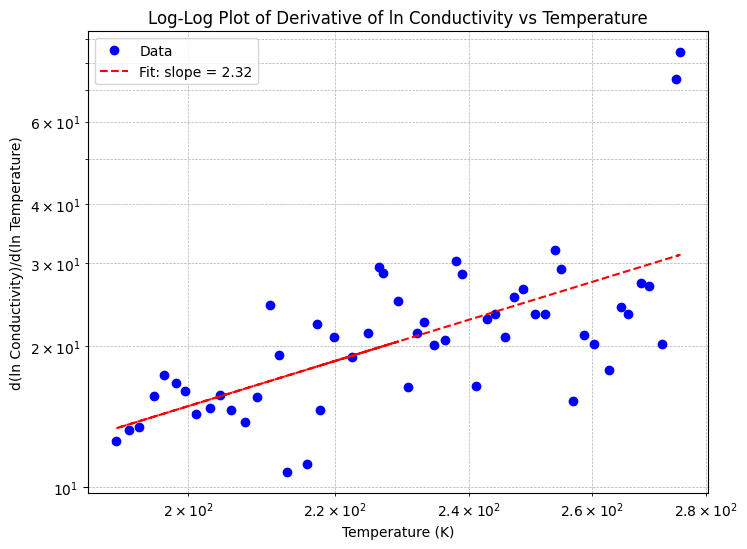

In [8]:
data = [
    (3.6395914277884476, 7.260402341153226e-9),
    (3.631793493707022, 8.507007725652395e-9),
    (3.674057991299504, 6.150548023212076e-9),
    (3.706308158279855, 5.4293102515382505e-9),
    (3.7254098133529903, 4.556497176293779e-9),
    (3.756602183552971, 3.986438953590985e-9),
    (3.772589364914015, 3.5532929357545237e-9),
    (3.8039060681221657, 3.0459458602562994e-9),
    (3.840654160784382, 2.5914694173953318e-9),
    (3.8643353815538886, 2.258766335400977e-9),
    (3.8929965052055815, 1.9563017114110923e-9),
    (3.9235571317088493, 1.7983342056565493e-9),
    (3.9384345637976335, 1.557758855623857e-9),
    (3.964235578869956, 1.351559729166913e-9),
    (3.990997867464046, 1.141795912623213e-9),
    (4.022485021002767, 9.64870549861432e-10),
    (4.045523589232226, 8.126676468662325e-10),
    (4.069384153444465, 7.204913949045193e-10),
    (4.094665535767954, 6.312178683165662e-10),
    (4.117593265764476, 5.482534987576521e-10),
    (4.146640207668445, 4.772330726244124e-10),
    (4.183975633689843, 4.2777235835362885e-10),
    (4.200922241298422, 3.703249668767157e-10),
    (4.230282439238978, 3.196106489301356e-10),
    (4.260662924608533, 2.7716090163229135e-10),
    (4.289370598799975, 2.419584684421569e-10),
    (4.308696281578621, 2.1717293575427243e-10),
    (4.333381045320293, 1.960627813819151e-10),
    (4.406572333040373, 1.611243366030422e-10),
    (4.416414013471165, 1.5044529131387434e-10),
    (4.447927210974765, 1.2596456635838617e-10),
    (4.495954391895467, 1.0644189367223753e-10),
    (4.547675978057922, 8.235579859369348e-11),
    (4.589532922579732, 6.880093531853379e-11),
    (4.627670636278197, 6.332865250171477e-11),
    (4.687639870484985, 5.3579050812987846e-11),
    (4.713058780206897, 5.081112313408245e-11),
    (4.741921217241163, 4.243094034102793e-11),
    (4.780127376641712, 3.681173856886204e-11),
    (4.81948733138597, 3.301052109811798e-11),
    (4.861936100364877, 2.913311993718708e-11),
    (4.896866666736987, 2.6192115593014323e-11),
    (4.92900892616151, 2.3524599127995206e-11),
    (4.9765849727321285, 2.0897873490510636e-11),
    (5.011525288896218, 1.8723378195549244e-11),
    (5.041155040283286, 1.7005520271025508e-11),
    (5.080398124722631, 1.4891977061998677e-11),
    (5.114496448088104, 1.3250657032443196e-11),
    (5.161698129358436, 1.1751610688650255e-11),
    (5.1971096854682415, 1.0700570387578578e-11),
    (5.240409802721306, 9.633259769984932e-12),
    (4.362377932145374, 1.7703617407993014e-10),
    (4.5994664250478206, 5.4504719446081854e-11)
]

temp_inv_AsTe, cond_AsTe = np.array([row[0] for row in data]), np.array([row[1] for row in data])
temp_AsTe = 1000/temp_inv_AsTe

ln_cond_AsTe = np.log(cond_AsTe)
ln_temp_AsTe = np.log(temp_AsTe)

W = np.gradient(ln_cond_AsTe, ln_temp_AsTe)
ln_W = np.log(W)

slope, intercept, r_value, p_value, std_err = linregress(ln_temp_AsTe, ln_W)

print(f"Slope of the log-log plot: {slope}")

fitted_line = np.exp(intercept) * temp_AsTe ** slope

plt.figure(figsize=(8, 6))
plt.loglog(temp_AsTe, W, marker='o', linestyle='none', color='b', label='Data')
plt.loglog(temp_AsTe, fitted_line, linestyle='--', color='r', label=f'Fit: slope = {slope:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Slope: 0.07629936663622688, Intercept: -40.77348644729976


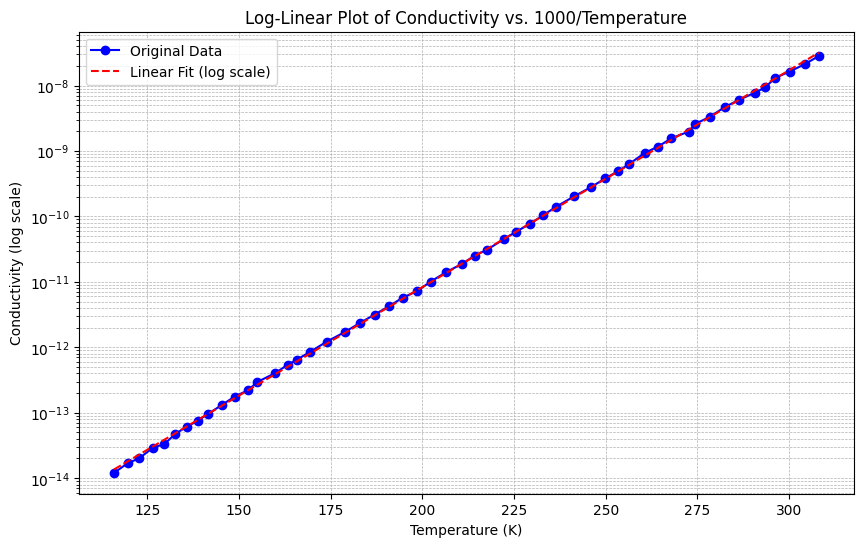

T_o: 13.106268689853065
sigma_o:  1.9601974865157943e-18


In [9]:
# AsTeSiGe

data = [
    (115.93994911043885, 1.210877051495386e-14),
    (119.71451574016793, 1.703930410486577e-14),
    (122.74689230225366, 2.0050373635795106e-14),
    (126.55114653468847, 2.939209401918354e-14),
    (129.60733101193108, 3.306759454574396e-14),
    (132.5958508882015, 4.7481972119128847e-14),
    (135.75353226690234, 6.109630594222618e-14),
    (138.685664975696, 7.511219123478506e-14),
    (141.61779768448963, 9.658272743487024e-14),
    (145.22657640300486, 1.30527533644305e-13),
    (148.8353551215201, 1.769161815746266e-13),
    (152.50052100751216, 2.214424976881883e-13),
    (154.9251692090146, 2.9373134807290623e-13),
    (159.88723994697307, 4.0454795923005524e-13),
    (163.2704699955811, 5.402057995929334e-13),
    (165.75150536456033, 6.461450589671595e-13),
    (169.36028408307556, 8.521779776425654e-13),
    (173.87125748121963, 1.2150105360220138e-12),
    (178.8333282191781, 1.7113881941588338e-12),
    (182.89320427750775, 2.3391039223524617e-12),
    (186.9530803358374, 3.1602725596910353e-12),
    (190.78740772425985, 4.203880998586118e-12),
    (194.6217351126823, 5.730948964056274e-12),
    (198.58494745533744, 7.250188712026915e-12),
    (202.2903898895272, 1.010607380991322e-11),
    (206.57581461776402, 1.4193662130351825e-11),
    (210.8612393460009, 1.8873775620452112e-11),
    (214.24446939460893, 2.5128213210043143e-11),
    (217.62769944321698, 3.099894593225584e-11),
    (222.36422151126825, 4.5302972085925206e-11),
    (225.52190288996908, 5.82646950418044e-11),
    (229.35623027839154, 7.700398881589128e-11),
    (232.8898261069377, 1.0375321420171361e-10),
    (236.57378771542201, 1.416159578213461e-10),
    (241.37475226058964, 2.0259551710844836e-10),
    (246.04683185152453, 2.814628065448499e-10),
    (249.88115923994698, 3.821729924488285e-10),
    (253.26438928855504, 4.869966611417556e-10),
    (256.42207066725587, 6.329421713813397e-10),
    (260.70749539549274, 9.396556696799154e-10),
    (264.31627411400797, 1.1694760689392735e-9),
    (267.9250528325232, 1.5674506603543909e-9),
    (272.66157490057446, 1.980033916951814e-9),
    (274.4659642598321, 2.5955577037919855e-9),
    (278.42917660248725, 3.3391100504025136e-9),
    (282.5857163764914, 4.719229625859001e-9),
    (286.34486087494474, 6.046589303646774e-9),
    (290.6678770481662, 7.757757425417918e-9),
    (293.52482686699074, 9.381831496867672e-9),
    (296.11863657092357, 1.2972228094372598e-8),
    (300.1785126292532, 1.6394590225200865e-8),
    (304.23838868758287, 2.1102570256688258e-8),
    (308.1049373145635, 2.8246761722330055e-8)
]

temp_AsTeSiGe, cond_AsTeSiGe = np.array([row[0] for row in data]), np.array([row[1] for row in data])

log_cond_AsTeSiGe = np.log(cond_AsTeSiGe)
coefficients = np.polyfit(temp_AsTeSiGe, log_cond_AsTeSiGe, 1)
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")
fitted_cond_AsTeSiGe = np.exp(intercept + slope * np.array(temp_AsTeSiGe))

plt.figure(figsize=(10, 6))
plt.plot(temp_AsTeSiGe, cond_AsTeSiGe, marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(temp_AsTeSiGe, fitted_cond_AsTeSiGe, linestyle='--', color='r', label='Linear Fit (log scale)')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Conductivity (log scale)')
plt.title('Log-Linear Plot of Conductivity vs. 1000/Temperature')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print(f"T_o: {1/slope}")
print(f"sigma_o:  {np.exp(intercept)}")

Slope of the log-log plot: 0.6287197900926935


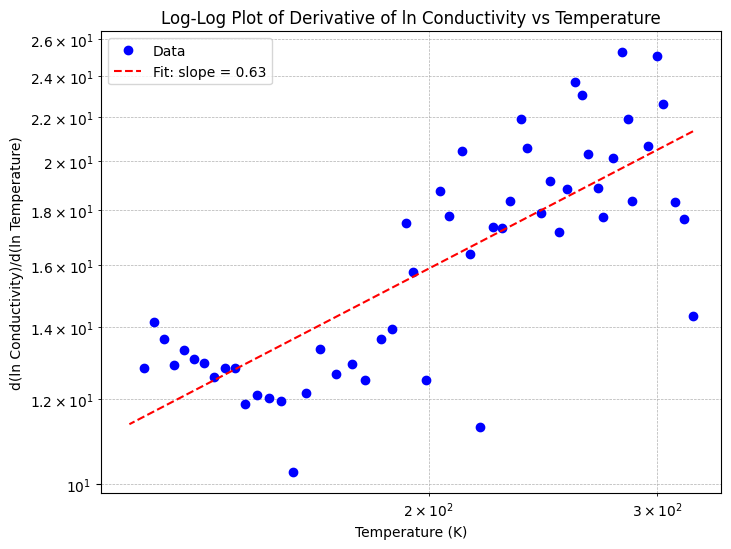

In [28]:
# AsTeSiGe

data = [
    (3.1284521435430213, 3.2780357738704737e-8),
    (3.179609122706556, 2.597746643460009e-8),
    (3.230766101870091, 1.8592873925334634e-8),
    (3.2982648938219774, 1.365193039323246e-8),
    (3.333080060197161, 1.0336304412907952e-8),
    (3.3867948883188728, 7.165708093038529e-9),
    (3.4856374802027026, 4.43810105158504e-9),
    (3.512129487269533, 3.848505542392128e-9),
    (3.5504972216421846, 2.891456310875864e-9),
    (3.6033981887317488, 2.032762138524758e-9),
    (3.67199504715558, 1.5192258684371656e-9),
    (3.7052470836118774, 1.282192651480167e-9),
    (3.767914383087208, 9.324180546026732e-10),
    (3.806282117459859, 7.529273428807524e-10),
    (3.857439096623394, 5.349120536471092e-10),
    (3.9113366282421183, 3.957761053409918e-10),
    (3.966147677345906, 3.168852445209496e-10),
    (4.030093901300324, 2.3551011906845956e-10),
    (4.094040125254743, 1.7257559978005746e-10),
    (4.196354083581813, 1.1911491101849083e-10),
    (4.241116440349906, 9.335947281567903e-11),
    (4.32424653149065, 6.341954592149599e-11),
    (4.388192755445068, 4.929091106098802e-11),
    (4.4585336017949295, 3.7330004961572535e-11),
    (4.565963258038353, 2.4807054264489406e-11),
    (4.643977651262743, 2.197318271808535e-11),
    (4.714318497612604, 1.519252200263065e-11),
    (4.823027078335116, 1.099370118779933e-11),
    (4.899762547080418, 7.980349730915536e-12),
    (5.022173890078877, 5.329151335925978e-12),
    (5.136363575711767, 4.351217340475689e-12),
    (5.206704422061628, 3.3226326201137337e-12),
    (5.334596869970465, 2.4005701878962694e-12),
    (5.436910828297535, 1.8266339382306878e-12),
    (5.5967763881835815, 1.2684222409371653e-12),
    (5.731063458487861, 9.445476386752499e-13),
    (5.897323640769349, 6.403776128923825e-13),
    (6.058102718140459, 4.662612951554671e-13),
    (6.217054760541442, 3.17255592670447e-13),
    (6.357736453241164, 2.545167745110617e-13),
    (6.498418145940884, 2.0153513906031382e-13),
    (6.639099838640606, 1.5191339505752097e-13),
    (6.779781531340327, 1.2093592705350203e-13),
    (6.920463224040048, 9.201372162571499e-14),
    (7.048355671948885, 7.575490531743788e-14),
    (7.176248119857722, 5.782896198005523e-14),
    (7.3105351901620015, 4.754368199362566e-14),
    (7.444822260466281, 3.6456735899134683e-14),
    (7.57910933077056, 2.975257684714939e-14),
    (7.7133964010748395, 2.294834898709786e-14),
    (7.85407809377456, 1.8531494581939383e-14),
    (7.994759786474281, 1.4455565839833082e-14),
    (8.135441479174002, 1.1458676130044355e-14),
    (8.276123171873724, 8.8621532133485e-15),
    (8.416804864573445, 7.395331405229791e-15),
    (8.499934955714188, 8.078272287194377e-15)
]

temp_inv_AsTeSiGe, cond_AsTeSiGe = np.array([row[0] for row in data]), np.array([row[1] for row in data])
temp_AsTeSiGe = 1000/temp_inv_AsTeSiGe

ln_cond_AsTeSiGe = np.log(cond_AsTeSiGe)
ln_temp_AsTeSiGe = np.log(temp_AsTeSiGe)

W = np.gradient(ln_cond_AsTeSiGe, ln_temp_AsTeSiGe)
ln_W = np.log(W)

slope, intercept, r_value, p_value, std_err = linregress(ln_temp_AsTeSiGe[:-2], ln_W[:-2])

print(f"Slope of the log-log plot: {slope}")

fitted_line = np.exp(intercept) * temp_AsTeSiGe ** slope

plt.figure(figsize=(8, 6))
plt.loglog(temp_AsTeSiGe[:-2], W[:-2], marker='o', linestyle='none', color='b', label='Data')
plt.loglog(temp_AsTeSiGe, fitted_line, linestyle='--', color='r', label=f'Fit: slope = {slope:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Slope: 0.06415326739560188, Intercept: -38.368887339472465


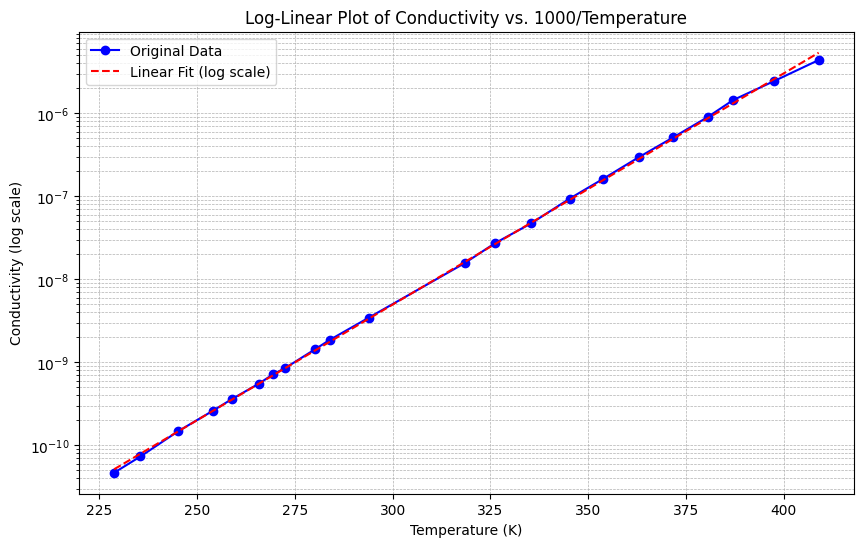

T_o: 15.587670598809693
sigma_o:  2.1707207199659693e-17


In [29]:
# GaAs

data = [
    (228.79819996198066, 4.6745581793456396e-11),
    (235.53797260491004, 7.338900996530082e-11),
    (245.07252040440318, 1.46757007175211e-10),
    (254.08710265125845, 2.6147018997794783e-10),
    (258.82032554040643, 3.5854313584963287e-10),
    (265.7501780337726, 5.513759096901063e-10),
    (269.4703619866847, 7.184486835634908e-10),
    (272.4880240606809, 8.501583464442041e-10),
    (280.15847522339203, 1.434500567255821e-9),
    (283.87790085359745, 1.8559379814436297e-9),
    (293.86592156536506, 3.442772649173593e-9),
    (318.40260941376187, 1.5638327592061858e-8),
    (326.12703696229164, 2.714745117335785e-8),
    (335.4490885447771, 4.7296848661701154e-8),
    (345.2131383119386, 9.348458853704108e-8),
    (353.8095141424318, 1.6214753462603518e-7),
    (362.8390917163693, 2.9383064549016504e-7),
    (371.6995151812786, 5.112623004307526e-7),
    (380.52816801528303, 8.995893623338413e-7),
    (387.03941181601124, 1.44196237001844e-6),
    (397.52537693316265, 2.4425890533409144e-6),
    (408.880783834134, 4.368360846943769e-6)
]

temp_GaAs, cond_GaAs = np.array([row[0] for row in data]), np.array([row[1] for row in data])

log_cond_GaAs = np.log(cond_GaAs)
coefficients = np.polyfit(temp_GaAs, log_cond_GaAs, 1)
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")
fitted_cond_GaAs = np.exp(intercept + slope * np.array(temp_GaAs))

plt.figure(figsize=(10, 6))
plt.plot(temp_GaAs, cond_GaAs, marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(temp_GaAs, fitted_cond_GaAs, linestyle='--', color='r', label='Linear Fit (log scale)')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Conductivity (log scale)')
plt.title('Log-Linear Plot of Conductivity vs. 1000/Temperature')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print(f"T_o: {1/slope}")
print(f"sigma_o:  {np.exp(intercept)}")

Slope of the log-log plot: 0.7744362303831401


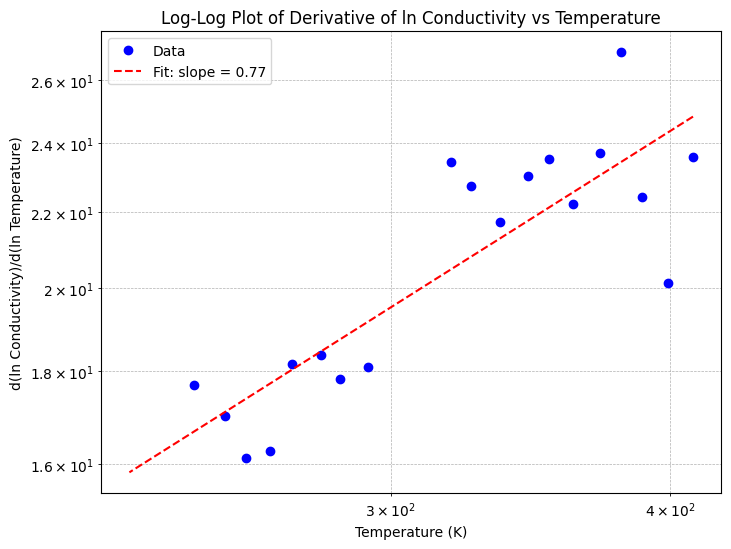

In [30]:
# GaAs

data = [
    (2.4425805732177475, 0.0000043908682814775565),
    (2.505215968975822, 0.000002416539975555883),
    (2.5744221403335117, 0.0000015457918564160594),
    (2.630719635342058, 8.583115635659464e-7),
    (2.6870515323170943, 4.879286237182589e-7),
    (2.762457996558352, 2.8157456200466284e-7),
    (2.8314392319812987, 1.5443455313664085e-7),
    (2.894217528215563, 9.371939833733435e-8),
    (2.978966772664007, 4.770479013000198e-8),
    (3.070173001592137, 2.6110307181961655e-8),
    (3.132953944131516, 1.5873874773757864e-8),
    (3.4132408787539115, 3.233669543298765e-9),
    (3.5109389351790705, 1.948998468838218e-9),
    (3.580290653318065, 1.377196540659057e-9),
    (3.6905736547666796, 7.663491212142388e-10),
    (3.7757335175587423, 5.165505276642942e-10),
    (3.8704474239163087, 3.5484570212451047e-10),
    (3.9524881750799334, 2.4857244828270466e-10),
    (4.081876176303587, 1.4336659607038562e-10),
    (4.233317602250827, 7.338139491818958e-11),
    (4.3628533555100475, 4.682343834983152e-11)
]

temp_inv_GaAs, cond_GaAs = np.array([row[0] for row in data]), np.array([row[1] for row in data])
temp_GaAs = 1000/temp_inv_GaAs

ln_cond_GaAs = np.log(cond_GaAs)
ln_temp_GaAs = np.log(temp_GaAs)

W = np.gradient(ln_cond_GaAs, ln_temp_GaAs)
ln_W = np.log(W)

slope, intercept, r_value, p_value, std_err = linregress(ln_temp_GaAs[:-2], ln_W[:-2])

print(f"Slope of the log-log plot: {slope}")

fitted_line = np.exp(intercept) * temp_GaAs ** slope

plt.figure(figsize=(8, 6))
plt.loglog(temp_GaAs[:-2], W[:-2], marker='o', linestyle='none', color='b', label='Data')
plt.loglog(temp_GaAs, fitted_line, linestyle='--', color='r', label=f'Fit: slope = {slope:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Slope: 0.08664166758780033, Intercept: -28.30817784931038


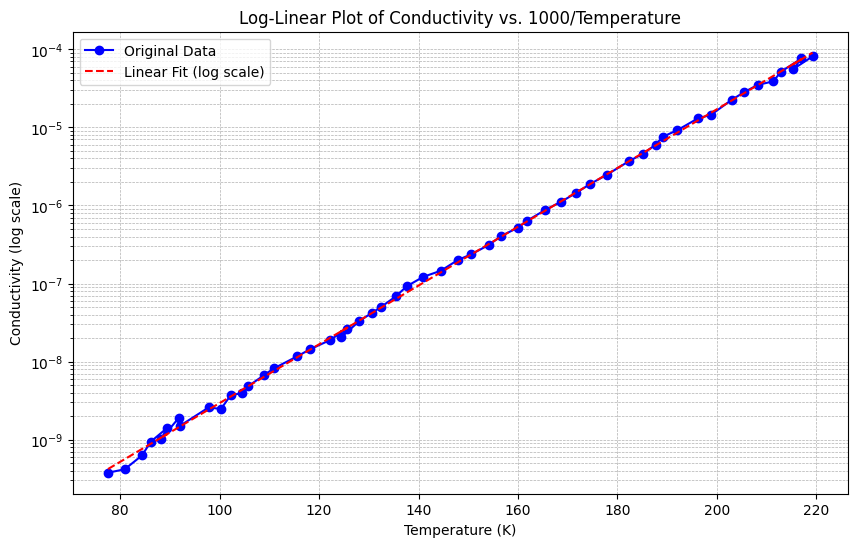

T_o: 11.541790778514587
sigma_o:  5.080594892780572e-13


In [35]:
# VO

data = [
    (77.54389174339633, 3.772266194002983e-10),
    (80.91266223471344, 4.179146278277959e-10),
    (84.39171847137092, 6.291006099181188e-10),
    (86.15344994603777, 9.429340130183623e-10),
    (89.41937581759765, 1.4101653098289228e-9),
    (88.22936999467649, 1.0186072716186985e-9),
    (91.83964596459396, 1.9195473042971425e-9),
    (92.08890094513889, 1.5139042632024015e-9),
    (97.79867198187736, 2.5888834725168474e-9),
    (100.26265712315896, 2.469264086879431e-9),
    (102.23278200451742, 3.7180814502117894e-9),
    (104.48140848675962, 3.9377722767874646e-9),
    (105.74922183855548, 4.835031608091326e-9),
    (108.87320622878238, 6.674025636853881e-9),
    (110.89605872137165, 8.175273502868674e-9),
    (115.60730119998348, 1.1673499285542299e-8),
    (118.10893865428147, 1.4298673078712773e-8),
    (122.1878984744157, 1.8836116063831587e-8),
    (125.68396572889728, 2.6528039844686938e-8),
    (124.4306723605782, 2.0411384733737073e-8),
    (128.1105411684575, 3.312802417942246e-8),
    (130.61717984110962, 4.1983824086013255e-8),
    (132.49923679920275, 5.02536434195783e-8),
    (135.43806298526002, 6.843716240301151e-8),
    (137.62533601481528, 9.215620059302297e-8),
    (140.94916972752316, 1.2173131850255294e-7),
    (144.4867476196987, 1.4572969141849324e-7),
    (147.95398586589073, 2.0089736605288173e-7),
    (150.58752752655204, 2.3610934514192857e-7),
    (154.21808394305842, 3.14220578947962e-7),
    (156.67219621886264, 4.074434802453119e-7),
    (160.00503410658175, 5.1956278953112e-7),
    (161.83932129776966, 6.363270901806566e-7),
    (165.52859052417537, 8.802051872296678e-7),
    (168.6749658086874, 0.0000011130327836016672),
    (171.71957334207977, 0.0000014491743419260974),
    (174.57510077752676, 0.0000018903247587007323),
    (177.90126450715263, 0.0000024743045765628473),
    (182.32581035280947, 0.0000036890849477024407),
    (185.10033482759727, 0.000004567966869843418),
    (187.6717642301729, 0.000005986263067821881),
    (189.12058011572063, 0.0000075723951905981554),
    (192.08782824595139, 0.000009226572660383097),
    (196.29766871558272, 0.00001314453935480432),
    (198.76423599091225, 0.000014385911762582818),
    (202.9880141981076, 0.000022494420796448232),
    (205.38396717936436, 0.000028001708111007742),
    (208.24986273086668, 0.000035073129065554266),
    (211.33635373910212, 0.00003876013543739283),
    (212.92277133107788, 0.00005164714339704666),
    (217.00994235126143, 0.00007636766267566186),
    (215.3922028223261, 0.000055894510840738014),
    (219.25770088928581, 0.00008115526524598496)
]


temp_VO, cond_VO = np.array([row[0] for row in data]), np.array([row[1] for row in data])

log_cond_VO = np.log(cond_VO)
coefficients = np.polyfit(temp_VO, log_cond_VO, 1)
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")
fitted_cond_VO = np.exp(intercept + slope * np.array(temp_VO))

plt.figure(figsize=(10, 6))
plt.plot(temp_VO, cond_VO, marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(temp_VO, fitted_cond_VO, linestyle='--', color='r', label='Linear Fit (log scale)')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Conductivity (log scale)')
plt.title('Log-Linear Plot of Conductivity vs. 1000/Temperature')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print(f"T_o: {1/slope}")
print(f"sigma_o:  {np.exp(intercept)}")

Slope of the log-log plot: 0.6693977950760455


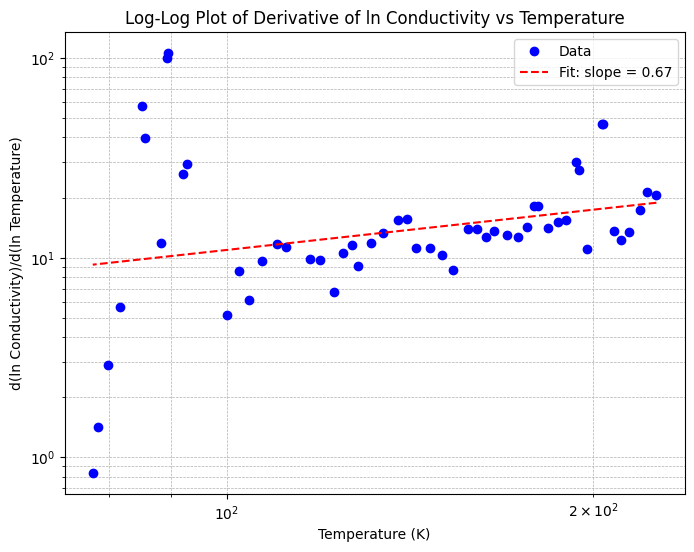

In [36]:
# VO

data = [
    (4.434907007924427, 0.00006854807277165667),
    (4.513211577337536, 0.00004782480970936235),
    (4.574587749606207, 0.00003565227361781857),
    (4.66672190247216, 0.00002866373511324045),
    (4.742106851043246, 0.000022379788020889112),
    (4.806224326726052, 0.00001966061476894806),
    (4.909377253138741, 0.000012924563148888665),
    (4.920350464966106, 0.00001157280237168635),
    (5.061618903244305, 0.000008400696925611372),
    (5.132370632822284, 0.000007219126688068041),
    (5.1609909530472295, 0.000005973622875895725),
    (5.261676914631446, 0.00000429709968347135),
    (5.342274013997146, 0.000003460470067590534),
    (5.444171960898228, 0.000002560577118573021),
    (5.553889873465485, 0.0000020066394494187124),
    (5.591557557400662, 0.0000017507537861139864),
    (5.6619301199625225, 0.0000014633757970786623),
    (5.7625608371330035, 0.0000011408828229149223),
    (5.884228534206054, 9.045286090742069e-7),
    (6.02831896391276, 6.263147586045494e-7),
    (6.1210345260993755, 5.15980540540024e-7),
    (6.234483612357704, 4.0776141914339067e-7),
    (6.340152324463894, 3.175480217711562e-7),
    (6.522531944090826, 2.2527648960155918e-7),
    (6.654177820491139, 1.9881420588342273e-7),
    (6.805650912760624, 1.422354815582736e-7),
    (6.990429278233009, 1.185956821085931e-7),
    (7.1119779794538385, 9.321204263039356e-8),
    (7.232848464004859, 6.97174981258765e-8),
    (7.446485575500024, 4.894697768934084e-8),
    (7.617330567666832, 3.5443267928816146e-8),
    (7.7997087488376415, 2.8423396010654013e-8),
    (7.885060497610663, 2.5761861573566297e-8),
    (8.024869717372285, 1.956981122631322e-8),
    (8.160880999749311, 1.7774603609647968e-8),
    (8.390062914368112, 1.4103043031367911e-8),
    (8.546878902516008, 1.1571925790860345e-8),
    (8.949076610625493, 8.070391954920132e-9),
    (9.091798116256557, 6.625926399843994e-9),
    (9.35025376717032, 4.965467791429427e-9),
    (9.591609763257068, 3.950334010771722e-9),
    (9.772647912201126, 3.665218565782425e-9),
    (10.008700195869963, 2.5962705457255896e-9),
    (10.216091571581316, 2.7538079389977304e-9),
    (10.783848293190696, 1.9903938785012493e-9),
    (10.86378225115784, 1.564336272577446e-9),
    (11.182977485267706, 1.4846463037492252e-9),
    (11.200526133595968, 1.2464955544281543e-9),
    (11.330762020383911, 1.035724397600711e-9),
    (11.543466699264144, 9.409936769750583e-10),
    (11.679613581565794, 1.0050046997218783e-9),
    (11.756930227662524, 6.523182498893911e-10),
    (12.240422638369786, 4.3710433614947266e-10),
    (12.53070252022583, 4.056757924460595e-10),
    (12.776210551819663, 3.85147900050903e-10),
    (12.894013461125112, 3.822179937562867e-10)
]

temp_inv_VO, cond_VO = np.array([row[0] for row in data]), np.array([row[1] for row in data])
temp_VO = 1000/temp_inv_VO

ln_cond_VO = np.log(cond_VO)
ln_temp_VO = np.log(temp_VO)

W = np.gradient(ln_cond_VO, ln_temp_VO)
ln_W = np.log(W)

delete_index = [43, 49]

temp_VO = np.delete(temp_VO, delete_index)
ln_temp_VO = np.delete(ln_temp_VO, delete_index)
W = np.delete(W, delete_index)
ln_W = np.delete(ln_W, delete_index)

slope, intercept, r_value, p_value, std_err = linregress(ln_temp_VO, ln_W)

print(f"Slope of the log-log plot: {slope}")

fitted_line = np.exp(intercept) * temp_VO ** slope

plt.figure(figsize=(8, 6))
plt.loglog(temp_VO, W, marker='o', linestyle='none', color='b', label='Data')
plt.loglog(temp_VO, fitted_line, linestyle='--', color='r', label=f'Fit: slope = {slope:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('d(ln Conductivity)/d(ln Temperature)')
plt.title('Log-Log Plot of Derivative of ln Conductivity vs Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()